# ***Praktikum 1***

* Import Library

In [1]:
import pandas as pd
import numpy as np


* Tampilkan beberapa data awal, ukuran data, informasi data, dan deskripsi statistik data untuk memahami karakteristik data.

In [2]:
df = pd.read_csv('../data/dataset.csv')
df.head()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


* Cek kekosongan data

In [3]:
df.isnull().sum

<bound method DataFrame.sum of      Email  Address  Avatar  Avg. Session Length  Time on App  \
0    False    False   False                False        False   
1    False    False   False                False        False   
2    False    False   False                False        False   
3    False    False   False                False        False   
4    False    False   False                False        False   
..     ...      ...     ...                  ...          ...   
495  False    False   False                False        False   
496  False    False   False                False        False   
497  False    False   False                False        False   
498  False    False   False                False        False   
499  False    False   False                False        False   

     Time on Website  Length of Membership  Yearly Amount Spent  
0              False                 False                False  
1              False                 False              

* Lakukan pengecekan banyak data / bentuk data

In [4]:

df.shape
 

(500, 8)

* Lakukan pengecekan info dari dataset

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


* Visualisasi Data

In [6]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns


* Gunakan pairplot untuk menampilkan hubungan antara variabel bebas dan variabel target dalam bentuk scatter plot.

C:\Users\FANDY HANZ\AppData\Roaming\Python\Python313\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


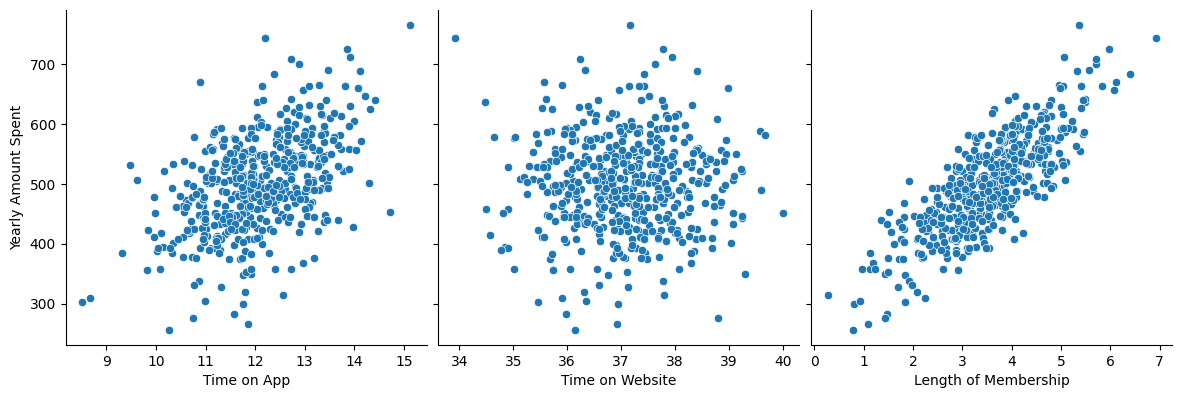

In [7]:
# visualisasi data dengan pairplot
sns.pairplot(df, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

* Gunakan pairplot untuk menampilkan hubungan antara variabel bebas dan variabel target dalam bentuk scatter plot.

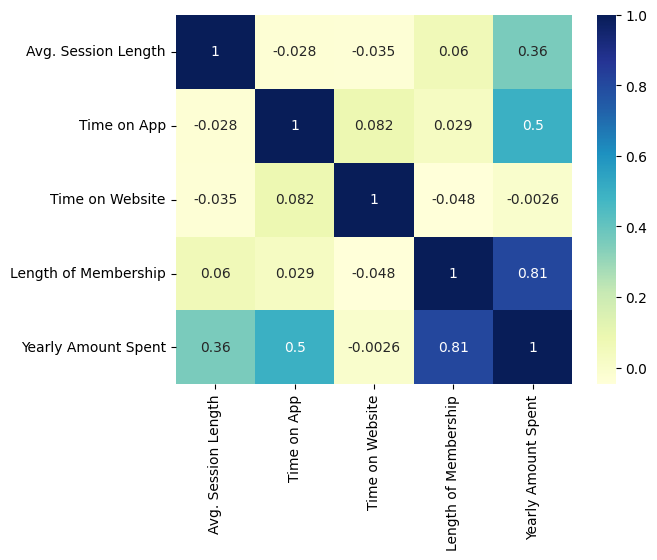

In [8]:
# visualisasi korelasi dengan heatmap
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

* Pisahkan variabel bebas (X) dan variabel target (y).

In [9]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = df['Length of Membership']
y = df['Yearly Amount Spent']

* Bagi data menjadi data latih (70%) dan data uji (30%) menggunakan train_test_split.

In [10]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


* Lakukan training model regresi linier menggunakan library StatsModels. Tambahkan konstanta (intercept) ke variabel bebas.

In [11]:
%pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()


* Visualisasikan garis regresi pada data latih.

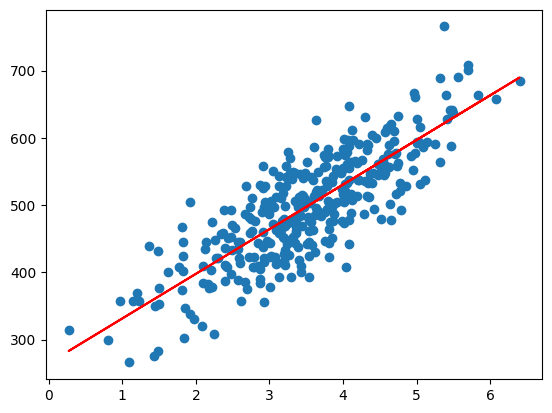

In [13]:
# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

* Lakukan analisis residual

In [14]:
# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)


* Visualisasikan residual dalam bentuk histogram dan scatter plot untuk mengevaluasi distribusi dan pola error.

C:\Users\FANDY HANZ\AppData\Local\Temp\ipykernel_48388\594495671.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


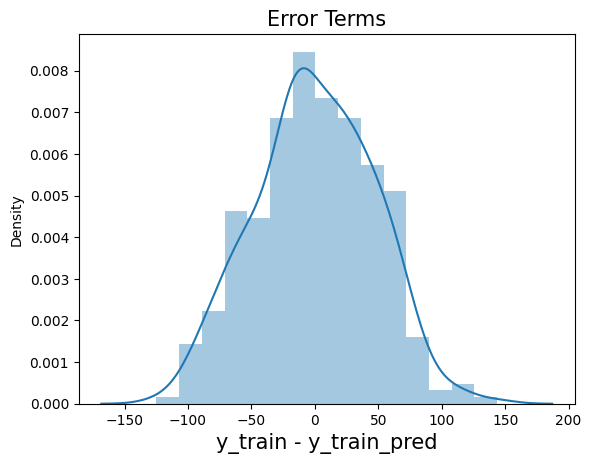

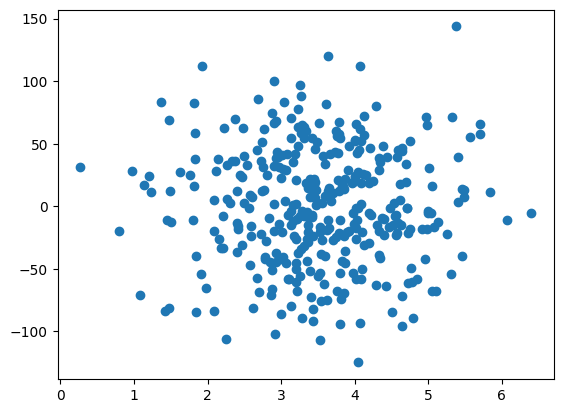

In [15]:
# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

* Lakukan prediksi dari data

In [16]:
# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)


* Hitung nilai R-squared untuk mengukur kinerja model pada data uji.

In [17]:
# Hitung nilai R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

* Lakukan visualisasi untuk hasil

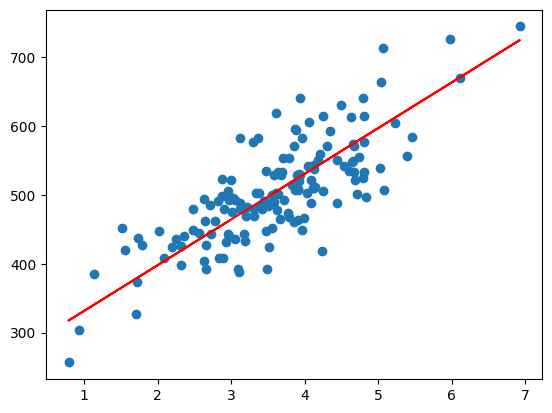

In [18]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

# ***Praktikum 2***

* Lakukukan pengambilan data set yang ada 

In [19]:
import matplotlib.pyplot as plt
df = pd.read_csv('../data/Posisi_gaji.csv')
X = df.iloc[:, 1 : 2]
y = df.iloc[:, 2]

* Lakukan scalling dengan menggunakan standar scaller

In [20]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.values.reshape(-1, 1))
y = sc_y.fit_transform(y.values.reshape(-1, 1))


* Lakukan fitting SVR dalam datasets

In [21]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

C:\Users\FANDY HANZ\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


* Lakukan visualisasi hasil dari SVR

C:\Users\FANDY HANZ\AppData\Local\Temp\ipykernel_48388\1841224750.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


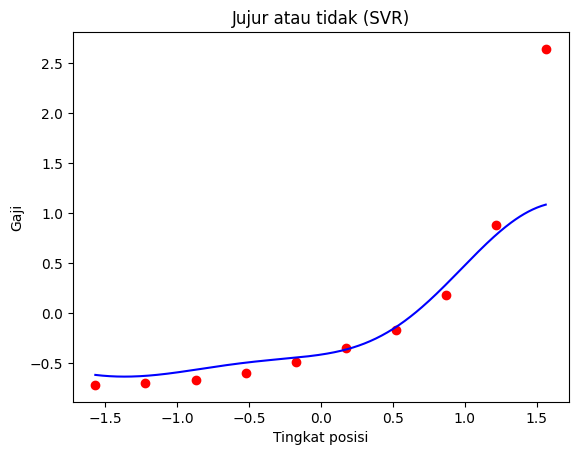

In [22]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

* Lakukan prediksi hasil dengan hasil yang telah di skala kan sebelumnya

In [23]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

* tampilkan hasil untuk atribut pada bagian 6.5

In [24]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


* Lakukan evaluasi model dengan method MAE, MSR, R-squared

In [25]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y 
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


# ***Tugas Praktikum***

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [26]:
df = pd.read_csv('../data/insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB



* Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [27]:
X = df.drop('charges', axis = 1)
y = df['charges']
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, train_size= 0.8, random_state= 100)

* Lakukan feature scaling jika diperlukan.

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)
X_test_preprocessed = preprocessor.fit_transform(X_test)
X_train_preprocessed = preprocessor.fit_transform(X_train)
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = sc_y.transform(y_test.values.reshape(-1, 1))

* Buat model multiple linear regression menggunakan Scikit-Learn.

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)
y_pred = model.predict(X_test_preprocessed)
print(y_pred[:5])


[27352.87867972 13248.35667687 15676.74502693  9658.60940944
 10473.37030823]


* Lakukan visualisasi model prediksi

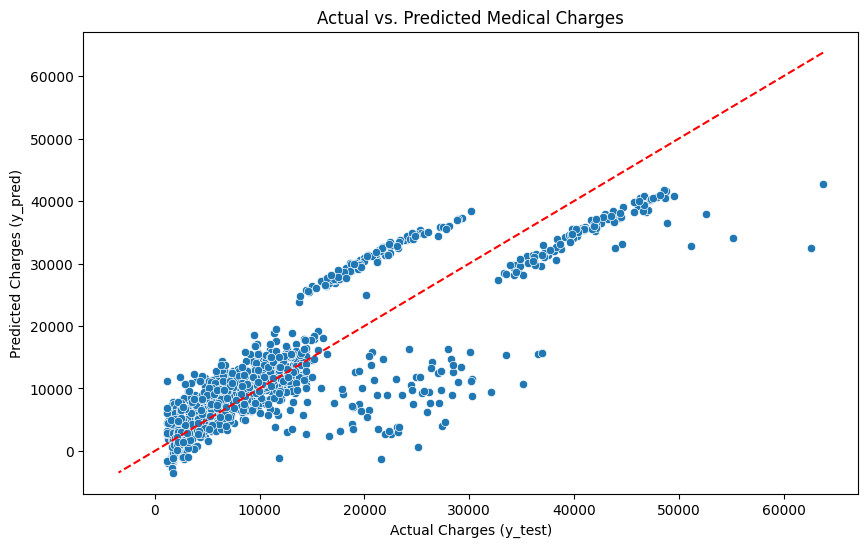

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)

# Add a line for perfect predictions
# We find the min and max values of our data to draw a diagonal line
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'r--') # 'r--' creates a red dashed line

plt.xlabel('Actual Charges (y_test)')
plt.ylabel('Predicted Charges (y_pred)')
plt.title('Actual vs. Predicted Medical Charges')
plt.show()

* Lakukan Evaluasi model

In [42]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("--- Hasil Evaluasi Model ---")
print(f"R-squared (R2): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

--- Hasil Evaluasi Model ---
R-squared (R2): 0.7292
Mean Absolute Error (MAE): 4404.18
Mean Squared Error (MSE): 38936326.77
Root Mean Squared Error (RMSE): 6239.90
